In [337]:
#data preprocessing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import os

#Classification Algorithms 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as m
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
import statsmodels.formula.api as smf

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#resampleing(under & up sampling)
!pip install imblearn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

## 1. Loading Data

In [338]:
bank=pd.read_csv("bank-full.csv")
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 2. Data preview

In [339]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


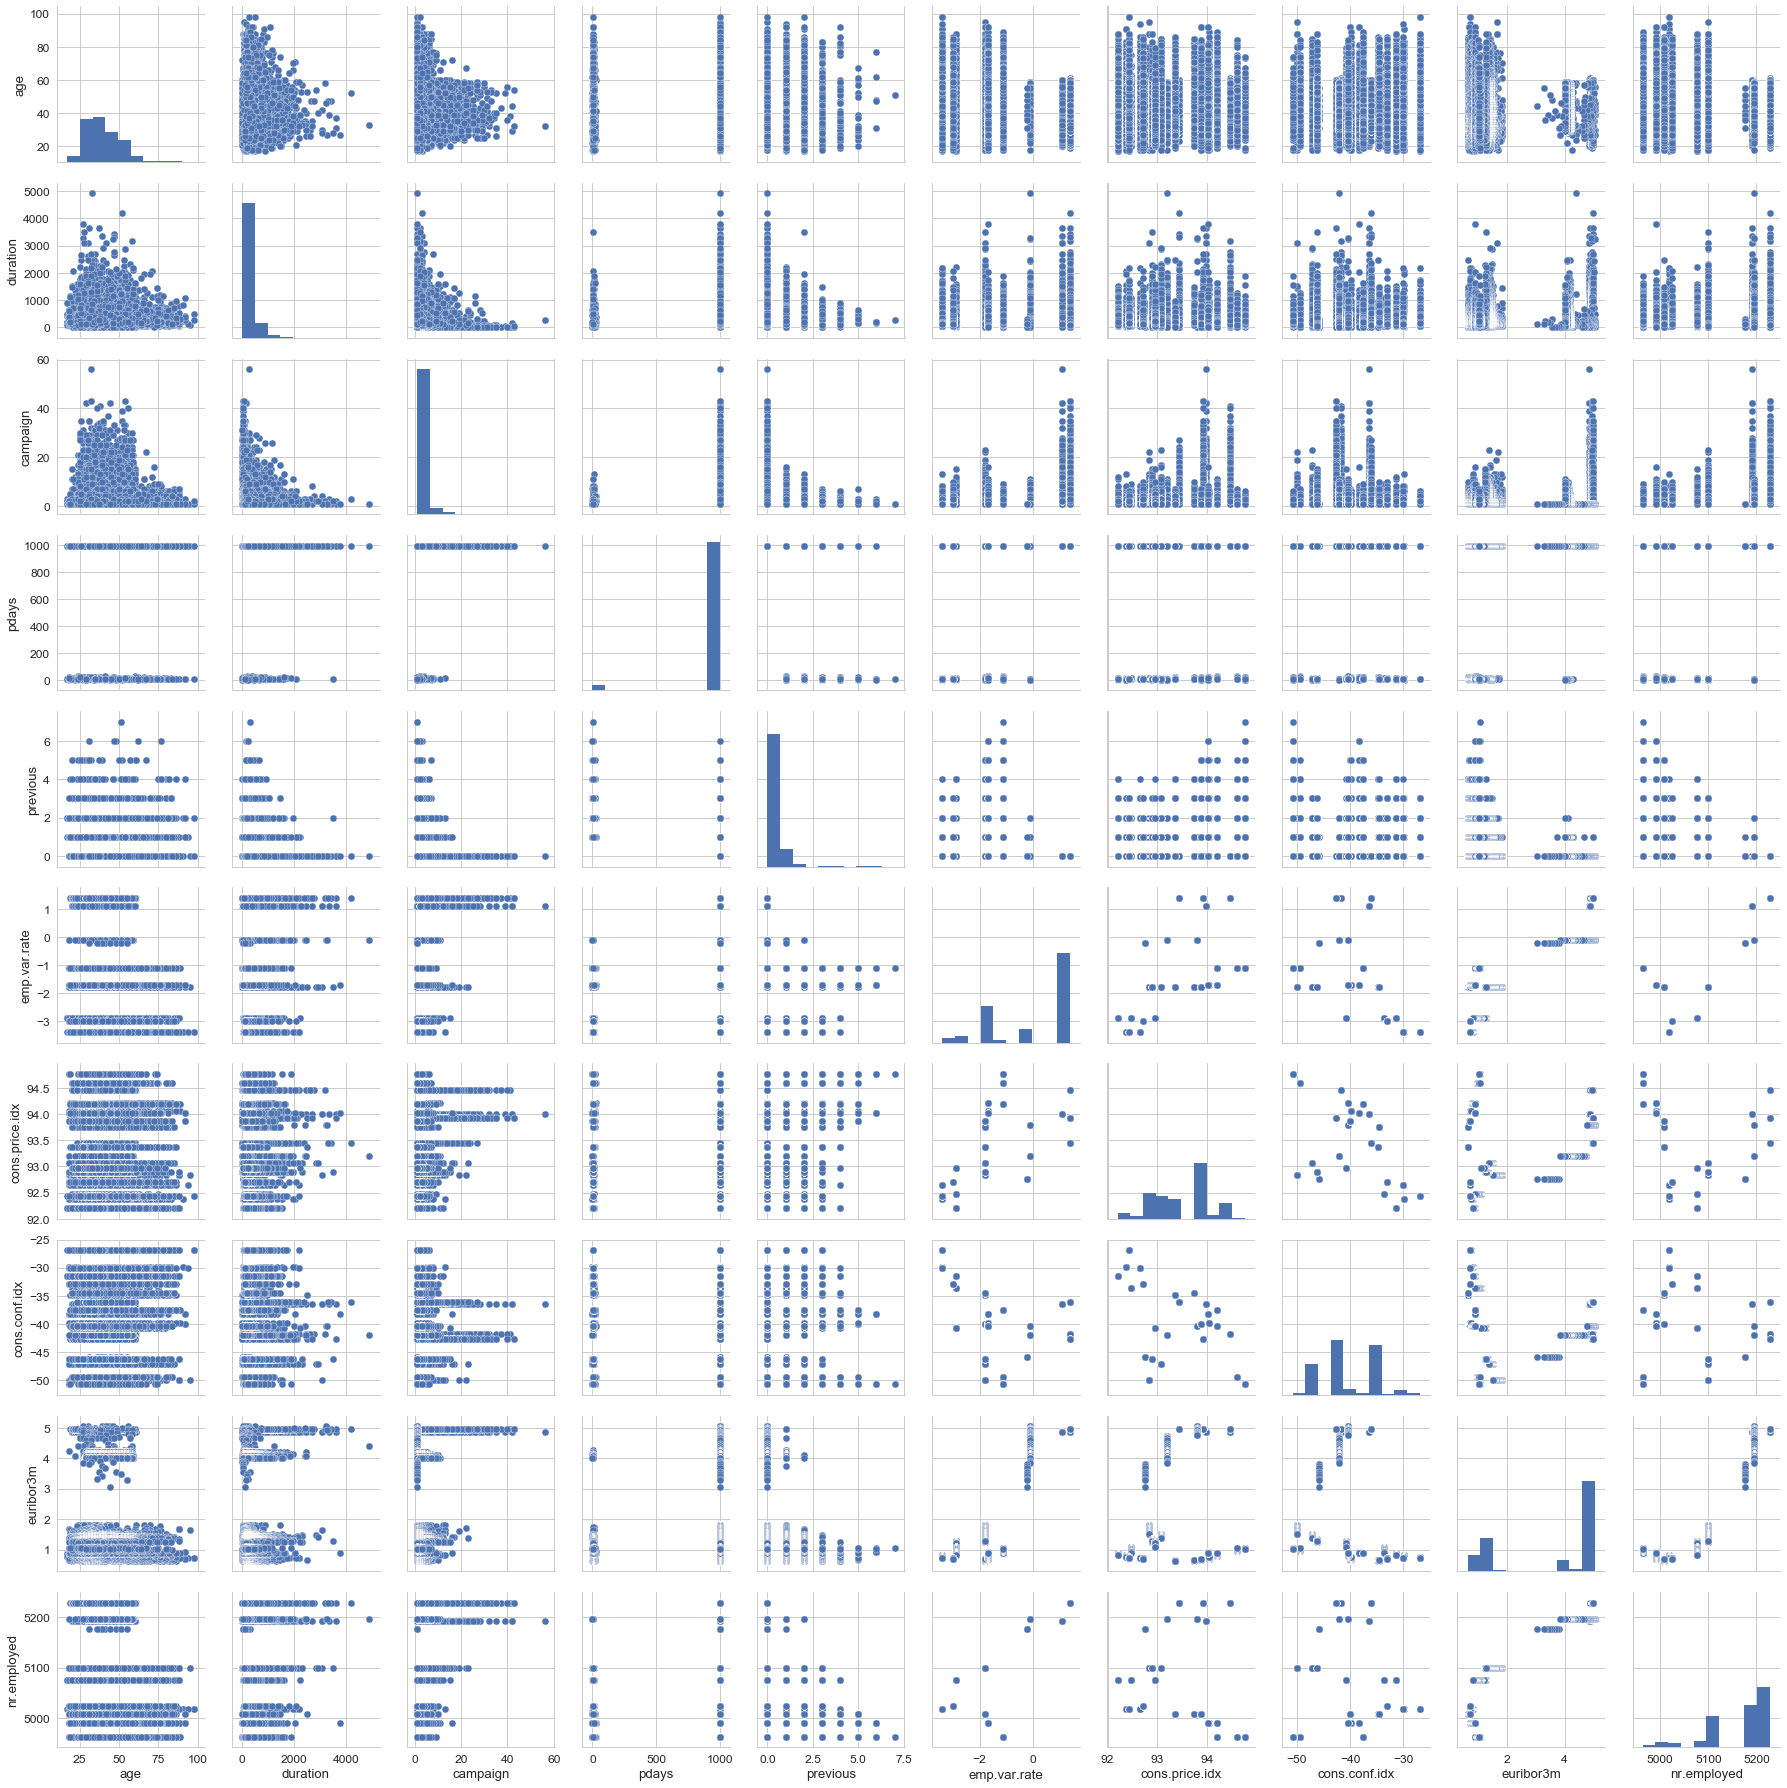

In [340]:
#plot features
sns.pairplot(bank)

In [341]:
#see data correlation
bank.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In [342]:
print('The distribution of class "no" and "yes":')
print(bank.y.value_counts())
print()
print('The proportion of class "no" and "yes":')
print(bank.y.value_counts()/len(bank))

The distribution of class "no" and "yes":
no     36548
yes     4640
Name: y, dtype: int64

The proportion of class "no" and "yes":
no     0.887346
yes    0.112654
Name: y, dtype: float64


###   From statistics above, it's easy to find that this dataset is inbalanced  

In [343]:
#check data types
bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

## 3. TWO Datasets--Original without & with feature engineering

### 3.1 Original dataset
#### 3.1.1Data preprocessing

In [344]:
#Binary transformation

bank.default.replace(("yes","no"),(1,0), inplace=True)
bank.housing.replace(("yes","no"),(1,0), inplace=True)
bank.loan.replace(("yes","no"),(1,0), inplace=True)
bank.y.replace(("yes","no"),(1,0), inplace=True)

In [345]:
#one-hot encoding

bank_ohe=pd.get_dummies(bank)

print(bank_ohe.columns)

len(bank_ohe.columns)


Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_0', 'default_1', 'default_unknown',
       'housing_0', 'housing_1', 'housing_unknown', 'loan_0', 'loan_1',
       'loan_unknown', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 

64

In [346]:
bank_ohe.to_csv("bank_ohe_ori")

#### 3.2 Normalization

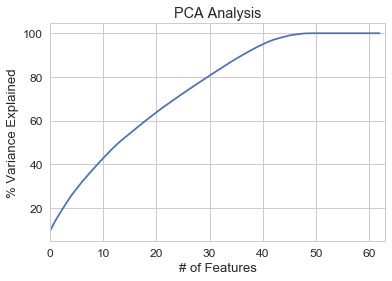

In [349]:
## Normalization & PCA 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

y=bank_ohe["y"]
x=bank_ohe.drop("y", axis=1)
train_x,test_x, train_y,test_y = train_test_split(x, y, train_size=0.8, stratify=bank.y, random_state=3)

#Standardize the Dataset
#from sklearn.preprocessing import MinMaxScaler
#scaler=MinMaxScaler()
scaler=StandardScaler()
train_x_scale=scaler.fit_transform(train_x)

#train_x_scale=scale(train_x)
pca=PCA(n_components=63)
pca.fit(train_x_scale)

var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

#lets see Cumulative Variance plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(font_scale=1.2,style="whitegrid")
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.xlim(0,63)
plt.style.context('seaborn-whitegrid')

plt.plot(var1)

In [350]:
var1


array([ 9.53, 14.22, 18.26, 22.06, 25.74, 28.86, 31.94, 34.79, 37.51,
       40.2 , 42.83, 45.36, 47.82, 50.07, 52.1 , 54.11, 56.1 , 58.06,
       60.01, 61.91, 63.8 , 65.61, 67.35, 69.07, 70.77, 72.45, 74.1 ,
       75.73, 77.35, 78.96, 80.56, 82.14, 83.71, 85.27, 86.81, 88.3 ,
       89.72, 91.11, 92.45, 93.73, 94.89, 96.01, 96.97, 97.67, 98.33,
       98.97, 99.35, 99.7 , 99.9 , 99.97, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98])

From Cumulative Variance plot we can find that first 50 components are explaining nearly 100% variability of actual data. So we will proceed with only 50 components for further modelling.

### 3.2 Feature engineering dataset

#### 3.2.1 Creation new feature 

In [351]:
#age_bin
bins=[18, 25, 35, 45, 55, 65, 75,95]
bank["age_bin"]=np.digitize(bank['age'],bins,right=False)

#age_group
#bank["age_group"]=0
bank.loc[bank["age"]<25, "age_group"]="Youth"
bank.loc[(bank["age"]>=25) & (bank["age"]<40), "age_group"]="Adult"
bank.loc[(bank["age"]>=40) & (bank["age"]<50), "age_group"]="Middle age"
bank.loc[(bank["age"]>=50) & (bank["age"]<65), "age_group"]="Nearly retired"
bank.loc[bank["age"]>=65, "age_group"]="Retired"


#income_level
bank.loc[(bank["job"]=="management")|(bank["job"]=="entrepreneur")|(bank["job"]=="self-employed")
         , "income_level"]="High-income"
bank.loc[(bank["job"]=="admin.")|(bank["job"]=="services")|(bank["job"]=="technician")
          ,"income_level"]="Middle-income"
bank.loc[(bank["job"]=="housemaid")|(bank["job"]=="blue-collar")
         , "income_level"]="Low-income"
bank.loc[bank["job"]=="retired","income_level"]="retired" 
bank.loc[bank["job"]=="student","income_level"]="student" 
bank.loc[bank["job"]=="unemployed","income_level"]="unemployed"         
bank.loc[bank["job"]=="unknown","income_level"]="unknown"


#marital_status
bank.loc[(bank["marital"]=="married")|(bank["marital"]=="divorced"),"marital_status"]="Marriage"
bank.loc[bank["marital"]=="single", "marital_status"]="No marriage"


#duration_min
bank.loc[bank["duration"]/60<1, "duration_min"]="<1"
bank.loc[(bank["duration"]/60>=1)&(bank["duration"]/60<5), "duration_min"]="1-5"
bank.loc[(bank["duration"]/60>=5)&(bank["duration"]/60<10), "duration_min"]="5-10"
bank.loc[(bank["duration"]/60>=10)&(bank["duration"]/60<15), "duration_min"]="10-15"
bank.loc[bank["duration"]/60>=15, "duration_min"]="15+"


#pdays_month
bank.loc[bank["pdays"]==999, "pdays_mon"]="0"
bank.loc[(bank["pdays"]/30>=0)&(bank["pdays"]/30<=6), "pdays_mon"]="1-6"
bank.loc[(bank["pdays"]!=999)&(bank["pdays"]/30>7), "pdays_mon"]="7+"


#not_contact
bank.loc[bank["previous"]==0, "not_contact"]=1
bank.loc[bank["previous"]!=0, "not_contact"]=0



#### 3.2 one hot encoding

In [352]:
## apply one hot encoding after conducting feature engineering
bank_feat_ohe = pd.get_dummies(bank)


#### 3.3 Remove outliers

In [353]:
def drop_outliers(df, field_name):
    distance = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > distance + np.percentile(df[field_name], 75)].index, inplace=True)
    df.drop(df[df[field_name] < np.percentile(df[field_name], 25) - distance].index, inplace=True)

In [354]:
bank_feat_ohe.quantile([0.25,0.75])

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,income_level_unknown,marital_status_Marriage,marital_status_No marriage,duration_min_1-5,duration_min_10-15,duration_min_15+,duration_min_5-10,duration_min_<1,pdays_mon_0,pdays_mon_1-6
0.25,32.0,102.0,1.0,999.0,0.0,-1.8,93.075,-42.7,1.344,5099.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0.75,47.0,319.0,3.0,999.0,0.0,1.4,93.994,-36.4,4.961,5228.1,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [355]:
drop_outliers(bank_feat_ohe, "age")
drop_outliers(bank_feat_ohe, "duration")
drop_outliers(bank_feat_ohe, "campaign")
bank_feat_ohe.shape

(35535, 87)

#### 3.4 Normalization

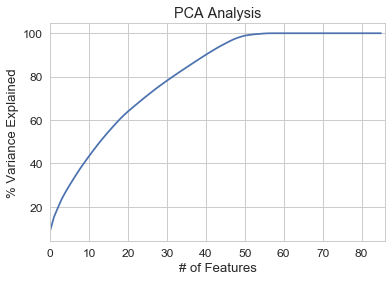

In [367]:
y=bank_feat_ohe["y"]
x=bank_feat_ohe.drop("y", axis=1)
train_x,test_x, train_y,test_y = train_test_split(x, y, train_size=0.8, stratify=bank_feat_ohe.y, random_state=3)

#Standardize the Dataset
#from sklearn.preprocessing import MinMaxScaler
#scaler=MinMaxScaler()
scaler=StandardScaler()
train_x_scale1=scaler.fit_transform(train_x)

#train_x_scale=scale(train_x)
pca=PCA(n_components=86)
pca.fit(train_x_scale1)

var1= pca.explained_variance_ratio_
var2=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

#lets see Cumulative Variance plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(font_scale=1.2,style="whitegrid")
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.xlim(0,86)
plt.style.context('seaborn-whitegrid')

plt.plot(var2)

In [368]:
var2

array([ 8.9 , 15.3 , 19.54, 23.64, 26.92, 29.94, 32.82, 35.64, 38.36,
       40.85, 43.33, 45.74, 48.09, 50.37, 52.51, 54.61, 56.63, 58.62,
       60.52, 62.3 , 63.93, 65.44, 66.95, 68.45, 69.93, 71.36, 72.78,
       74.17, 75.52, 76.82, 78.11, 79.36, 80.59, 81.81, 83.01, 84.2 ,
       85.39, 86.57, 87.74, 88.9 , 90.05, 91.17, 92.25, 93.31, 94.31,
       95.26, 96.19, 97.06, 97.77, 98.37, 98.87, 99.15, 99.4 , 99.57,
       99.72, 99.87, 99.95, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98, 99.98,
       99.98, 99.98, 99.98, 99.98, 99.98])

In [356]:
bank_feat_ohe.to_csv('bank_feat_ohe_remove_outlier.csv',index=False)

## 6. Modeling
### 6.1 Baseline Check


Importing training and test data

In [357]:
data_ori = pd.read_csv('bank_ohe_ori.csv',sep=',',header='infer')
data_feat = pd.read_csv('bank_feat_ohe_remove_outlier.csv',sep=',',header='infer')

In [358]:
y = pd.DataFrame(data_ori['y'])
X = data_ori.drop(['y'], axis=1)
y1 = pd.DataFrame(data_feat['y'])
X1 = data_feat.drop(['y'], axis=1)

In [359]:
#define the classifiers
classifiers = {'Gradient Boosting Classifier':GradientBoostingClassifier(),
               'Adaptive Boosting Classifier':AdaBoostClassifier(),
               'Linear Discriminant Analysis':LinearDiscriminantAnalysis(),
               'Logistic Regression':LogisticRegression(),
               'Random Forest Classifier': RandomForestClassifier(),
               'Decision Tree Classifier':DecisionTreeClassifier(),
               'K Nearest Neighbour':KNeighborsClassifier(8), 
               'Gaussian Naive Bayes Classifier':GaussianNB()}

In [360]:
#define the log format to be printed out
log_cols = ["Classifier", "MCC", "Accuracy","Precision Score","Recall Score"]
log = pd.DataFrame(columns=log_cols)
log.iloc[0:0]

,Classifier,MCC,Accuracy,Precision Score,Recall Score


### 6.2 Model Building with 5 fold CV - original

In [361]:
skf = StratifiedKFold(n_splits=5, random_state=3, shuffle=True)
skf.get_n_splits(X, y)

log_total = {}
i=0

for Name,classify in classifiers.items():
    log_total[i] = pd.DataFrame(columns=log_cols)
    for train_index, test_index in skf.split(X,y):
        X_train,X_test = X.iloc[train_index], X.iloc[test_index]
        y_train,y_test = y.iloc[train_index], y.iloc[test_index]
        cls = classify
        cls =cls.fit(X_train,y_train)
        y_out = cls.predict(X_test)
        mcc = m.matthews_corrcoef(y_test,y_out)
        accuracy = m.accuracy_score(y_test,y_out)
        precision = m.precision_score(y_test,y_out,average='macro')
        recall = m.recall_score(y_test,y_out,average='macro')
        log_entry = pd.DataFrame([[Name,mcc,accuracy,precision,recall]], columns=log_cols)
        log_total[i] = log_total[i].append(log_entry)
    print(Name)
    print(log_total[i].mean(axis=0))
    i+=1


Gradient Boosting Classifier
MCC                0.550163
Accuracy           0.917185
Precision Score    0.804054
Recall Score       0.748998
dtype: float64
Adaptive Boosting Classifier
MCC                0.474041
Accuracy           0.909998
Precision Score    0.796867
Recall Score       0.689254
dtype: float64
Linear Discriminant Analysis
MCC                0.510597
Accuracy           0.909027
Precision Score    0.777864
Recall Score       0.734617
dtype: float64
Logistic Regression
MCC                0.474898
Accuracy           0.910144
Precision Score    0.797281
Recall Score       0.689713
dtype: float64
Random Forest Classifier
MCC                0.463464
Accuracy           0.907789
Precision Score    0.786105
Recall Score       0.687727
dtype: float64
Decision Tree Classifier
MCC                0.453625
Accuracy           0.888997
Precision Score    0.723372
Recall Score       0.730386
dtype: float64
K Nearest Neighbour
MCC                0.473648
Accuracy           0.908857
Preci

### 6.3 Model Building with 5 folds CV - feature engineering

In [362]:
skf = StratifiedKFold(n_splits=5, random_state=3, shuffle=True)
skf.get_n_splits(X1, y1)

log_total = {}
i=0

for Name,classify in classifiers.items():
    log_total[i] = pd.DataFrame(columns=log_cols)
    for train_index, test_index in skf.split(X1,y1):
        X1_train,X1_test = X1.iloc[train_index], X1.iloc[test_index]
        y1_train,y1_test = y1.iloc[train_index], y1.iloc[test_index]
        cls = classify
        cls =cls.fit(X1_train,y1_train)
        y1_out = cls.predict(X1_test)
        mcc = m.matthews_corrcoef(y1_test,y1_out)
        accuracy = m.accuracy_score(y1_test,y1_out)
        precision = m.precision_score(y1_test,y1_out,average='macro')
        recall = m.recall_score(y1_test,y1_out,average='macro')
        log_entry = pd.DataFrame([[Name,mcc,accuracy,precision,recall]], columns=log_cols)
        log_total[i] = log_total[i].append(log_entry)
    print(Name)
    print(log_total[i].mean(axis=0))
    i+=1


Gradient Boosting Classifier
MCC                0.545058
Accuracy           0.939552
Precision Score    0.814530
Recall Score       0.736262
dtype: float64
Adaptive Boosting Classifier
MCC                0.496579
Accuracy           0.934431
Precision Score    0.795020
Recall Score       0.709204
dtype: float64
Linear Discriminant Analysis
MCC                0.507476
Accuracy           0.927902
Precision Score    0.757815
Recall Score       0.749757
dtype: float64
Logistic Regression
MCC                0.478358
Accuracy           0.934093
Precision Score    0.800008
Recall Score       0.690769
dtype: float64
Random Forest Classifier
MCC                0.479399
Accuracy           0.933812
Precision Score    0.796870
Recall Score       0.693631
dtype: float64
Decision Tree Classifier
MCC                0.450321
Accuracy           0.916082
Precision Score    0.719969
Recall Score       0.730634
dtype: float64
K Nearest Neighbour
MCC                0.462643
Accuracy           0.933530
Preci

### 6.4 Decision Tree with 5 folds CV and parameter tuning - feature engineering

In [363]:
skf = StratifiedKFold(n_splits=5, random_state=3, shuffle=True)
skf.get_n_splits(X1, y1)

classify = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto', priors=None, 
                                      n_components=None, store_covariance=False)
log = pd.DataFrame(columns=log_cols)
Name = "Decision Tree Classifier with tuning"

for train_index, test_index in skf.split(X1,y1):
    X1_train,X1_test = X1.iloc[train_index], X1.iloc[test_index]
    y1_train,y1_test = y1.iloc[train_index], y1.iloc[test_index]
    y1_train = np.ravel(y1_train)
    y1_test = np.ravel(y1_test)
    cls = classify
    cls = cls.fit(X1_train,y1_train)
    y1_out = cls.predict(X1_test)
    mcc = m.matthews_corrcoef(y1_test,y1_out)
    accuracy = m.accuracy_score(y1_test,y1_out)
    precision = m.precision_score(y1_test,y1_out,average='macro')
    recall = m.recall_score(y1_test,y1_out,average='macro')
    log_entry = pd.DataFrame([[Name,mcc,accuracy,precision,recall]], columns=log_cols)
    log = log.append(log_entry)
print(Name)
print(log.mean(axis=0))

Decision Tree Classifier with tuning
MCC                0.507645
Accuracy           0.929675
Precision Score    0.765042
Recall Score       0.743105
dtype: float64


### 6.5 GBoost with 5 folds CV and parameter tuning - feature engineering

In [364]:
skf = StratifiedKFold(n_splits=5, random_state=3, shuffle=True)
skf.get_n_splits(X1, y1)

classify=GradientBoostingClassifier(learning_rate=0.2, min_samples_split=200, min_samples_leaf=50,
                           max_depth=9,max_features='sqrt',subsample=0.8,random_state=3)

log = pd.DataFrame(columns=log_cols)
Name = "Gradient Boosting Classifier with tuning"

for train_index, test_index in skf.split(X1,y1):
    X1_train,X1_test = X1.iloc[train_index], X1.iloc[test_index]
    y1_train,y1_test = y1.iloc[train_index], y1.iloc[test_index]
    y1_train = np.ravel(y1_train)
    y1_test = np.ravel(y1_test)
    cls = classify
    cls = cls.fit(X1_train,y1_train)
    y1_out = cls.predict(X1_test)
    mcc = m.matthews_corrcoef(y1_test,y1_out)
    accuracy = m.accuracy_score(y1_test,y1_out)
    precision = m.precision_score(y1_test,y1_out,average='macro')
    recall = m.recall_score(y1_test,y1_out,average='macro')
    log_entry = pd.DataFrame([[Name,mcc,accuracy,precision,recall]], columns=log_cols)
    log = log.append(log_entry)
print(Name)
print(log.mean(axis=0))

Gradient Boosting Classifier with tuning
MCC                0.538453
Accuracy           0.938230
Precision Score    0.806833
Recall Score       0.736336
dtype: float64


### 6.6 Random forest with 5 folds CV and parameter tuning - feature engineering

In [365]:
skf = StratifiedKFold(n_splits=5, random_state=3, shuffle=True)
skf.get_n_splits(X1, y1)

classify = RandomForestClassifier(n_estimators=15, min_samples_split=15, random_state=3)

log = pd.DataFrame(columns=log_cols)
Name = "Random Forest Classifier with tuning"

for train_index, test_index in skf.split(X1,y1):
    X1_train,X1_test = X1.iloc[train_index], X1.iloc[test_index]
    y1_train,y1_test = y1.iloc[train_index], y1.iloc[test_index]
    y1_train = np.ravel(y1_train)
    y1_test = np.ravel(y1_test)
    cls = classify
    cls = cls.fit(X1_train,y1_train)
    y1_out = cls.predict(X1_test)
    mcc = m.matthews_corrcoef(y1_test,y1_out)
    accuracy = m.accuracy_score(y1_test,y1_out)
    precision = m.precision_score(y1_test,y1_out,average='macro')
    recall = m.recall_score(y1_test,y1_out,average='macro')
    log_entry = pd.DataFrame([[Name,mcc,accuracy,precision,recall]], columns=log_cols)
    log = log.append(log_entry)
print(Name)
print(log.mean(axis=0))


Random Forest Classifier with tuning
MCC                0.518782
Accuracy           0.938511
Precision Score    0.820754
Recall Score       0.709994
dtype: float64


### 6.7 Model building with Random Under Sampling- feature engineering

In [ ]:
skf = StratifiedKFold(n_splits=5, random_state=3, shuffle=True)
skf.get_n_splits(X1, y1)

rus = RandomUnderSampler(return_indices=True)

log_total = {}
i=0

for Name,classify in classifiers.items():
    log_total[i] = pd.DataFrame(columns=log_cols)
    for train_index, test_index in skf.split(X1,y1):
        X1_train,X1_test = X1.iloc[train_index], X1.iloc[test_index]
        y1_train,y1_test = y1.iloc[train_index], y1.iloc[test_index]
        X1_train_rus, y1_train_rus, id_rus = rus.fit_sample(X1_train, y1_train)
        cls = classify
        cls =cls.fit(X1_train_rus,y1_train_rus)
        y1_out = cls.predict(X1_test)
        mcc = m.matthews_corrcoef(y1_test,y1_out)
        accuracy = m.accuracy_score(y1_test,y1_out)
        precision = m.precision_score(y1_test,y1_out,average='macro')
        recall = m.recall_score(y1_test,y1_out,average='macro')
        log_entry = pd.DataFrame([[Name,mcc,accuracy,precision,recall]], columns=log_cols)
        log_total[i] = log_total[i].append(log_entry)
    print(Name)
    print(log_total[i].mean(axis=0))
    i+=1

### 6.8 Model building with Random Over Sampling - feature engineering

In [ ]:
skf = StratifiedKFold(n_splits=5, random_state=3, shuffle=True)
skf.get_n_splits(X1, y1)

ros = RandomOverSampler()

log_total = {}
i=0

for Name,classify in classifiers.items():
    log_total[i] = pd.DataFrame(columns=log_cols)
    for train_index, test_index in skf.split(X1,y1):
        X1_train,X1_test = X1.iloc[train_index], X1.iloc[test_index]
        y1_train,y1_test = y1.iloc[train_index], y1.iloc[test_index]
        X1_train_ros, y1_train_ros = ros.fit_sample(X1_train, y1_train)
        cls = classify
        cls =cls.fit(X1_train_ros,y1_train_ros)
        y1_out = cls.predict(X1_test)
        mcc = m.matthews_corrcoef(y1_test,y1_out)
        accuracy = m.accuracy_score(y1_test,y1_out)
        precision = m.precision_score(y1_test,y1_out,average='macro')
        recall = m.recall_score(y1_test,y1_out,average='macro')
        log_entry = pd.DataFrame([[Name,mcc,accuracy,precision,recall]], columns=log_cols)
        log_total[i] = log_total[i].append(log_entry)
    print(Name)
    print(log_total[i].mean(axis=0))
    i+=1

### 6.9 GBoost with tuning and over-sampling - feature engineering(MCC 0.578)

In [ ]:
skf = StratifiedKFold(n_splits=5, random_state=3, shuffle=True)
skf.get_n_splits(X1, y1)

classify=GradientBoostingClassifier(learning_rate=0.2, min_samples_split=200, min_samples_leaf=50, n_estimators=100,
                           max_depth=9,max_features='sqrt',subsample=1,random_state=3)

log = pd.DataFrame(columns=log_cols)
Name = "Gradient Boosting Classifier with tuning and over-sampling"

for train_index, test_index in skf.split(X1,y1):
    X1_train,X1_test = X1.iloc[train_index], X1.iloc[test_index]
    y1_train,y1_test = y1.iloc[train_index], y1.iloc[test_index]
    X1_train_ros, y1_train_ros = ros.fit_sample(X1_train, y1_train)
    y1_train_ros = np.ravel(y1_train_ros)
    y1_test = np.ravel(y1_test)
    cls = classify
    cls = cls.fit(X1_train_ros,y1_train_ros)
    y1_out = cls.predict(X1_test)
    mcc = m.matthews_corrcoef(y1_test,y1_out)
    accuracy = m.accuracy_score(y1_test,y1_out)
    precision = m.precision_score(y1_test,y1_out,average='macro')
    recall = m.recall_score(y1_test,y1_out,average='macro')
    log_entry = pd.DataFrame([[Name,mcc,accuracy,precision,recall]], columns=log_cols)
    log = log.append(log_entry)
print(Name)
print(log.mean(axis=0))

### 6.10 Random Forest with tuning and under-sampling - feature engineering((MCC 0.525)

In [ ]:
skf = StratifiedKFold(n_splits=5, random_state=3, shuffle=True)
skf.get_n_splits(X1, y1)

classify = RandomForestClassifier(n_estimators=100, max_features=20, min_samples_split=5, random_state=3)

log = pd.DataFrame(columns=log_cols)
Name = "Random Forest Classifier with tuning and under-sampling"

for train_index, test_index in skf.split(X1,y1):
    X1_train,X1_test = X1.iloc[train_index], X1.iloc[test_index]
    y1_train,y1_test = y1.iloc[train_index], y1.iloc[test_index]
    X1_train_rus, y1_train_rus, id_rus = rus.fit_sample(X1_train, y1_train)
    y1_train_rus = np.ravel(y1_train_rus)
    y1_test = np.ravel(y1_test)
    cls = classify
    cls = cls.fit(X1_train_rus,y1_train_rus)
    y1_out = cls.predict(X1_test)
    mcc = m.matthews_corrcoef(y1_test,y1_out)
    accuracy = m.accuracy_score(y1_test,y1_out)
    precision = m.precision_score(y1_test,y1_out,average='macro')
    recall = m.recall_score(y1_test,y1_out,average='macro')
    log_entry = pd.DataFrame([[Name,mcc,accuracy,precision,recall]], columns=log_cols)
    log = log.append(log_entry)
print(Name)
print(log.mean(axis=0))